# 1. PRNGs

## 1.1 Linear Congruential Generators (LCGs)

In the lecture, you were introduced to the linear congruential generator which calculates new pseudorandom integers by calculating `(x * n) + 1 = ((a * x) + b) % c`. The period of the LCG is closely linked to the value `c`. The period of a PRNG is the number of outputs before the pseudorandom sequence begins to repeat. For the LCG to have a full period, `b` and `c` must be relatively prime (i.e. their greatest common divisor is 1), `a − 1` is divisible by all prime factors of `c`, and `a − 1` is a multiple of 4 if `c` is a multiple of 4.

If these requirements aren’t satisfied, the outputs of an LCG can be incredibly poor, even for non-cryptographic uses. For example, any full cycle LCG with `c = (2 * n)` will alternate between odd and even outputs. This can be seen by testing the values `a, b, c = 23, 21, 2` and printing the pseudorandom output `n % 2`. A standard choice of parameters for an LCG used in the 1970s, called RANDU, were so poor that it has unfortunately called many scientific results from that period of time into question.

In the example code `lab2a_lcg.py`, Bob has decided to use an LCG for a simple gambling application. Luckily, he’ll only play recreationally and won’t ever involve money. Read through and understand his example code.

In [1]:
# Lab 2a: LCG

a, b = 23, 21
c = 2**8-1
# To show what happens when you select a bad set of values,
# set c = 2**8 and watch what happens to 'x % 2'
# It will always flip between 0 and 1 -- i.e. is 100% predictable

def lcg_generate(x):
  return (a * x + b) % c

# This generates a full set of cards: each suit with each type
# To understand the syntax, Google for "list comprehensions"
cards = [s+n for s in "SDHC" for n in "A23456789XJQK"]
# The list comprehension above is equivalent to the for loops below
# cards = []
# for suit in 'SDHC':
#     for card_type in "A23456789XJQK":
#         cards.append(suit + card_type)

if __name__ == "__main__":
  x = 19
  print("Starting the LCG with seed =", x)
  for i in range(15):
    x = lcg_generate(x)
    print("%s (%d %d)" % (cards[x % 52], x, x % 2))


Starting the LCG with seed = 19
C9 (203 1)
CX (100 0)
HA (26 0)
S6 (109 1)
DK (233 1)
DK (25 1)
H9 (86 0)
S7 (214 0)
C8 (98 0)
H2 (235 1)
D7 (71 1)
D8 (124 0)
D4 (68 0)
S4 (55 1)
SQ (11 1)


Generated random sequence with length 200 beginning with 19.


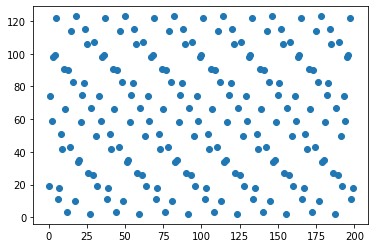

In [2]:
# Optional: Plot periodicity

from matplotlib import pyplot

# Parameters
starting_seed = 19
a, b = 23, 21
c = 2 ** 7

# Generate the PRNG sequence using the previous value as the seed for the next
prng_vals = [starting_seed]
index = range(200)
for i in index:
    prng_vals.append(lcg_generate(prng_vals[-1]))
print(f"Generated random sequence with length %d beginning with %d." % (len(index), prng_vals[0]))

# Plot values
prng_vals = prng_vals[0:len(index)]
pyplot.scatter(index, prng_vals)


### 1.1.1 When life gives you lemons. . .

If you were forced to use a linear congruential generator for a project and were concerned about protecting the PRNG, what might you do? How much more secure, if at all, would this make the LCG? Specifically consider:

* How to prevent an attacker who compromises the current internal state from easily reconstructing the stream of random numbers prior to the internal state’s revelation
* How to make it it difficult for the attacker from determining the internal state from the output of your PRNG


# 2. One Time Pads

When used correctly, One Time Pads (OTPs) provide perfect secrecy and provide no information about the original message to a cryptanalyst (other than the maximum possible length of the message). This is as, given a truly random key `k`, the resulting cyphertext `c` is equally likely to be any from the full cyphertext space `C`. It is important to note that whilst the OTP
provides perfect secrecy, there are other aspects to security however. The OTP provides no guarantees as to integrity.

Given a message `m` and a key of the same length `k`, we can calculate the cyphertext by computing `c = m ⊕ k`. To decode it, we just apply the key to the cyphertext, computing `m = c ⊕ k = m ⊕ k ⊕ k = m`. This is as `x ⊕ x` cancels itself out and results purely in zeroes. If this doesn’t seem intuitive, it’s highly suggested you play around with XOR on a piece of paper with two arrays of bits.

Example code is provided to show how you can implement a XOR cipher yourself (`lab2b xor.py`) and how to use the XOR cipher in the PyCrypto library (`lab2c xor.py`).

m: 10010011 10010010 01110101
k: 00010010
            00010010 00010010

c: 10000001 10000000 01100110

c(1,2,3) = (m1 x k1) || (m2 x k1) || (m3 x k1)

c1 x c2

= (m1 x k1) x (m2 x k1)

= m1 x m2

In [3]:
# Lab 2b: XOR

# Let's create a simple XOR cipher
m = "DNA test results: Luke Skywalker and Darth Vader are related".encode("ascii")
key = "darth123".encode("ascii")
print("Encoding m =", m)

def xor_bytes(m, k):
    c = []
    for char in m:
        # For each letter in the message, we xor it with the value from the key
        # The key's value uses modulus to repeat the key and use the letters in the appropriate spot
        c.append(char ^ key[i % len(k)])
    return c

# Notice that to encrypt and decrypt it's the exact same operation
c = xor_bytes(m, key)
print("c =", c)
m_dash = xor_bytes(c, key)

# We tell Python to read the block of bytes as a string instead of raw numbers
m_dash = bytes(m_dash).decode("ascii")
print("Reconstructed message m =", m_dash)


Encoding m = b'DNA test results: Luke Skywalker and Darth Vader are related'
c = [119, 125, 114, 19, 71, 86, 64, 71, 19, 65, 86, 64, 70, 95, 71, 64, 9, 19, 127, 70, 88, 86, 19, 96, 88, 74, 68, 82, 95, 88, 86, 65, 19, 82, 93, 87, 19, 119, 82, 65, 71, 91, 19, 101, 82, 87, 86, 65, 19, 82, 65, 86, 19, 65, 86, 95, 82, 71, 86, 87]
Reconstructed message m = DNA test results: Luke Skywalker and Darth Vader are related


In [4]:
# Lab 2c: XOR

# Instead of writing it ourselves, let's use a pre-written one from PyCryptodome
# PyCryptodome is the library we'll be using for the project

from Crypto.Util.strxor import strxor
from Crypto.Random import get_random_bytes

# Write a message and generate a key
m = b"Jerry Seinfeld will be chosen to star in the new Microsoft commercial"
l = len(m)
print("m:  ", m)

k = get_random_bytes(16)
print("k:  ", k)

# This function will pad the key with copies of itself until it is the same length as the message
def pad_key(k, l):
    while len(k) < l:
        k = k + k
        k = k[0:l] if len(k) > l else k
    return k

# XOR the message with the padded key
c = strxor(m, pad_key(k, l))
print("c:  ", c)

# Decrypt by XORing the ciphertext with the padded key
m_dash = strxor(c, pad_key(k, l))
print("m': ", m_dash)


m:   b'Jerry Seinfeld will be chosen to star in the new Microsoft commercial'
k:   b'6\xbdGy\xce6U\xf5\xd6\xdb!\x1bW\xf6@!'
c:   b'|\xd85\x0b\xb7\x16\x06\x90\xbf\xb5G~;\x92`V_\xd1+Y\xacSu\x96\xbe\xb4R~9\xd64N\x16\xce3\x18\xbc\x16<\x9b\xf6\xafI~w\x98%V\x16\xf0.\x1a\xbcY&\x9a\xb0\xaf\x01x8\x9b-DD\xde.\x18\xa2'
m':  b'Jerry Seinfeld will be chosen to star in the new Microsoft commercial'


## 2.1. DES and Padding Messages

Due to the way ciphers work, ciphers commonly can only operate on messages that are a multiple of the cipher’s blocksize. An example of this is the DES cipher that operates on blocks of 8 bytes. When you have a message of the wrong size, the message must be padded before it can be supplied to a cipher.

There are many ways to pad a message, but one of the easiest methods is ANSI X.923. If the message is 5 bytes long and needs to be 8, we add two null bytes and the final byte with the number of padding bytes added (in this case: 3).

`mo = [m1 m2]`

`mp = [m1 m2 0 0 0 0 0 6]`

In the file `crypto_utils.py`, we provide an implementation of ANSI X.923 that you may use whenever you find appropriate. You can see an example use in `lab2d_des.py`.

In [5]:
# crypto_utils.py

# ANSI X.923 pads the message with zeroes
# The last byte is the number of zeroes added
# This should be checked on unpadding
def ANSI_X923_pad(m, pad_length):
    # Work out how many bytes need to be added
    required_padding = pad_length - (len(m) % pad_length)
    # Use a bytearray so we can add to the end of m
    b = bytearray(m)
    # Then k-1 zero bytes, where k is the required padding
    b.extend(bytes("\x00" * (required_padding-1), "ascii"))
    # And finally adding the number of padding bytes added
    b.append(required_padding)
    return bytes(b)

def ANSI_X923_unpad(m, pad_length):
    # The last byte should represent the number of padding bytes added
    required_padding = m[-1]
    # Ensure that there are required_padding - 1 zero bytes
    if m.count(bytes([0]), -required_padding, -1) == required_padding - 1:
        return m[:-required_padding]
    else:
        # Raise an exception in the case of an invalid padding
        raise AssertionError("Padding was invalid")
        

In [9]:
# Instead of writing it ourselves, let's use a pre-written one from PyCrypto
# PyCryptodome is the library we'll be using for the project

# To start with, let's import the XOR cipher
from Crypto.Cipher import DES
# We'll also use their random to get random bits for our key
from Crypto.Random import get_random_bytes

m = "Jerry Seinfeld will be chosen to star in the new Microsoft commercial".encode("ascii")
key = get_random_bytes(DES.block_size)
print(m)

# We need to pad the message before encryption
from crypto_utils import ANSI_X923_pad, ANSI_X923_unpad
padded_m = ANSI_X923_pad(m, DES.block_size)

# Create a new cipher object and pass in the key to be used
# For PyCryptodome, the key must be between 1 and 32 bytes -- likely to discourage real world usage
cipher = DES.new(key, DES.MODE_ECB)
c = cipher.encrypt(padded_m)
print(c)

# We need to reset the cipher as, by default, the cipher would continue from where it left off
# (i.e. it assumes you're going to continue encrypting or decrypting)
padded_m = cipher.decrypt(c)
m_dash = ANSI_X923_unpad(padded_m, DES.block_size)
print(m_dash)

# We'll make sure the decrypted message is the same as the original
assert(m == m_dash)


b'It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way - in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.'
b'-\xe9\xf2\xf1\xddR\xe9\xe1\xec\x93\x1f\x8b\x84\xbe\xce-T\xb4\x9c?p\x87I\xb9\x01\xaf\\\x00[\xf7\x16\n\xef,H\xfe\xb5\xe75\xd7\xc1\xc0N\xebC\xf5\xaa\xd8!\xa32\xb0J\xd46s?\xa9H\xaf~M\xef\xab\xc1\x95\x97\x98\xa9\x91\xff\x7fe\x8d\xcf2V@\x8d\xb5\xf0\x1b\xe2_\x8a\xc2\'\x1a\xbe1\x10\x80%\x03\xfae\xa73\xa9\xdf$\xc7\xc4\x87\xbf\xa5\xdb\xdapHr\xe6W\xe2\x83\xa7\x01\xf4C\x8e\x90\xee"N\xcazl\x

# 3. Fiestel Networks

In the lectures we discussed Feistel networks, specifically through the implementation of DES2. The Fiestel network accepts a 2n-bit plaintext `(L0, R0)` as input, with `L0` and `R0` being n-bit respectively. Two operations are performed at each stage in the `r` rounds:

`Li = Ri−1`

`Ri = Li−1 ⊕ fKi(Ri−1)` where `i` and `i−1` denote the current and previous iteration respectively and `Ki` is the subkey for the round derived from the cypher key `K`

The function `fKi` does not need to be invertible to allow for decryption of the ciphertext. Decryption is achieved by using the same `r` round process but in reverse order.

To see how the encryption and decryption works by working through an example of three rounds. It may look complicated but it will make sense if you work through it slowly.

**Encoding**

`L0 = mL`

`R0 = mR`

—

`L1 = R0`

`R1 = L0 ⊕ fK0(R0)`

—

`L2 = R1`

`R2 = L1 ⊕ fK1(R1)`

—

`L3 = R2 = CL`

`R3 = L2 ⊕ fK2(R2) = CR`

—

**Decoding**
Now let’s decode. . .

`L2 = R3 ⊕ fK2(L3) = R3 ⊕ fK2(R2) = (L2 ⊕ fK2(R2)) ⊕ fK2(R2) = L2`

`R2 = L3`

—

`L1 = R2 ⊕ fK1(L2) = R2 ⊕ fK1(R1) = (L1 ⊕ fK1(R1)) ⊕ fK1(R1) = L1`

`R1 = L2`

—

`L0 = R1 ⊕ fK0(L1) = R1 ⊕ fK0(R0) = (L0 ⊕ fK0(R0)) ⊕ fK0(R0) = L0`

`R0 = L1 = mR`

Thus, we’ve shown that the Feistel structure is reversible and does not rely on `fK` being reversible.


In [1]:
# -*- coding: utf-8 -*-

"""
用Miller-Rabin素性测试和离散对数Pollard_rho算法进行大数因数分解：
复杂度：0(n^1/4)
适用范围：n 2-10^33
 
"""
import random
from math import log, log10
from collections import Counter


def gcd(x, y):
    return x if y == 0 else gcd(y, x % y)


def fpow(a, x, n):
    ans = 1
    while x > 0:
        if x & 1:
            ans = ans * a % n
        a = a * a % n
        x >>= 1
    return ans


# there change the times of Rabin-Miller
TIMES = 10


def is_prime(n):
    def check(a, n, x, t):
        ret = fpow(a, x, n)
        last = ret
        for i in range(0, t):
            ret = ret * ret % n
            if ret == 1 and last != 1 and last != n - 1:
                return True
            last = ret
        if ret != 1:
            return True
        return False

    if not isinstance(n, int):
        raise TypeError(str(n) + ' is not an integer!')
    if n <= 0:
        raise ValueError('%d <= 0' % n)
    if n in {2, 3, 5, 7, 11}:
        return True
    for i in {2, 3, 5, 7, 11}:
        if n % i == 0:
            return False
    x = n - 1
    t = 0
    while not x & 1:
        x >>= 1
        t += 1
    for i in range(0, TIMES):
        a = random.randint(1, n - 2)
        if check(a, n, x, t):
            return False
    return True


def pollard_rho_2(n, c):
    x = random.randint(0, n)
    i, k, y = 1, 2, x
    while True:
        i += 1
        x = (x * x) % n + c
        d = gcd(y - x, n)
        if d != 1 and d != n:
            return d
        if y == x:
            return n
        if i == k:
            y = x
            k <<= 1


def pollard_rho_1(n):
    if not isinstance(n, int):
        raise TypeError(str(n) + ' is not an integer!')
    if n == 1:
        return None
    if is_prime(n):
        return [n]
    ans = []
    p = n
    while p >= n:
        p = pollard_rho_2(p, random.randint(1, n - 1))
    ans.extend(pollard_rho_1(p))
    ans.extend(pollard_rho_1(n // p))
    return ans


def factorization(n):
    return Counter(pollard_rho_1(n))


if __name__ == '__main__':
    n = 25083017086314967114061751681969470775795402592206227257253684298080659343926294937729517299335741
    print('len:', len(str(n)))
    print(factorization(n))


len: 98
